# Présentation

Ce notebook contient les consignes ainsi que des emplacements vides pour apporter les réponses aux questions posées.

Ne changez pas les noms de variable qui vous sont proposées.




# Echauffement

## Création DataFrame à partir de 0

A partir d'une base de données SQLite3 dont le code python est présent ci-dessous, nous allons recréer un dataframe manuellement basée sur les mêmes données. En seconde partie, nous verrons comment convertir un résultat de requêtes SQL directement en dataframe

```csv
fruit,origin,quantity
apple,france,12
apple,germany,78
apple,france,19
orange,france,10
orange,germany,98
strawberry,spain,2
```

la requête SQL pour créer la table contenant ces données

```sql
CREATE TABLE basket(fruit text, origin text, quantity int)
```


In [62]:
import pandas as pd
import matplotlib.pyplot as plt


Créer une série représentant la colonne `fruit` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [4]:
fruit = pd.Series(['apple','apple','apple','orange','orange','strawberry'],name='fruit')
print(fruit)

0         apple
1         apple
2         apple
3        orange
4        orange
5    strawberry
Name: fruit, dtype: object


Créer une série représentant la colonne `origin` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [15]:
origin = pd.Series(['france','germany','france','france','germany','spain'],name='origin')

Créer une série représentant la colonne `quantity` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [13]:
quantity = pd.Series([12,78,19,10,98,2],name='quantity')

Créer un dataframe composé de ces 3 séries créées précédemment grâce au constructeur [`pd.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)

In [19]:
basket = pd.DataFrame({'fruit':fruit,'origin':origin,'quantity':quantity})
basket.head()

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98


## Création DataFrame à partir d'un fichier CSV

Vous obtenez une seconde série de données, via un fichier CSV cette fois-ci. Vous pouvez donc lire le fichier CSV directement via la méthode `read_csv`.

Ce fichier CSV contient les informations suivantes

```csv
fruit,origin,quantity
kiwi,uk,12
kiwi,new zealand,78
pineapple,france,19
blueberry,canada,10
blueberry,canada,98
strawberry,spain,2
```

In [21]:
basketTom = pd.read_csv('./read.csv')
basketTom

,fruit,origin,quantity
0,kiwi,uk,12
1,kiwi,new zealand,78
2,pineapple,france,19
3,blueberry,canada,10
4,blueberry,canada,98
5,strawberry,spain,2


Combiner les dataframes basket et basketTom en un nouveau dataframe basketFull

In [34]:
basketFull = pd.concat([basketTom, basket], ignore_index=True)
basketFull

,fruit,origin,quantity
0,kiwi,uk,12
1,kiwi,new zealand,78
2,pineapple,france,19
3,blueberry,canada,10
4,blueberry,canada,98
5,strawberry,spain,2
6,apple,france,12
7,apple,germany,78
8,apple,france,19
9,orange,france,10


## Requêtes sur le DataFrame
Pour répondre à chacune des questions, proposer une requête sur le dataframe `basketFull`. Attention à ne jamais modifier le dataframe `basketFull`.

Quelle est la quantité max envoyée par pays d'origine tous fruits confondus ?

In [41]:
somme = basketFull.groupby('origin')['quantity'].sum()
somme

origin
canada         108
france          60
germany        176
new zealand     78
spain            4
uk              12
Name: quantity, dtype: int64

Quelle est la quantité max reçue par fruit et par pays d'origine ?

In [89]:
somme = basketFull.groupby(['fruit','origin'])['quantity'].max()
somme

fruit       origin     
apple       france         19
            germany        78
blueberry   canada         98
kiwi        new zealand    78
            uk             12
orange      france         10
            germany        98
pineapple   france         19
strawberry  spain           2
Name: quantity, dtype: int64

Quelle est la quantité totale de fruits reçus par fruit ?

In [86]:
somme = basketFull.groupby('fruit')['quantity'].sum()
somme

fruit
apple         109
blueberry     108
kiwi           90
orange        108
pineapple      19
strawberry      4
Name: quantity, dtype: int64

\Afficher dans un graphique de barres empilées la quantité de fruits transférés.

<Axes: xlabel='fruit'>

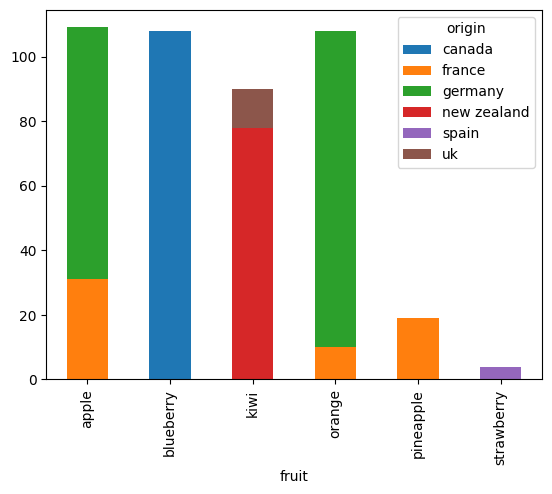

In [85]:
stack = basketFull.groupby(['fruit','origin'])['quantity'].sum()
unstack = stack.unstack()
unstack.plot(kind='bar', stacked=True)

# Transactions immobilières

Pour cette seconde partie, nous repartons sur la collecte des transactions immobilières et nous allons tenter d'identifier les caractéristiques les plus pertinentes.

Télécharger le [fichier des transactions immobilières](https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt)

Créer un premier dataframe qui ne va conserver que les transactions relatives à Charleville-Mézières.

Modifier le dataframe pour convertir les montants en k€.

Conserver dans le dataframe uniquement les colonnes utiles :
- No voie
- Type de voie
- Code voie
- Voie
- Code postal
- Commune
- Code departement
- Code commune
- Valuer fonciere
- Nombre pieces principales
- Surface Carrez du 1er lot

Grâce l'[API Adresse](https://adresse.data.gouv.fr/api-doc/adresse), envoyer votre fichier d'adresse pour récupérer les coordonnées GPS correspondantes

Construire un nouveau dataframe contenant uniquement latitude, longitude, valeur foncière, surface et nbre de pièces


Afficher un 1er graphique x = latitude, y = longitude et la couleur correspondant au prix sous forme de scatter.

Indiquer quelle est la valeur de la transaction immobilière la plus importante.

Où se situe le centre géographique de toutes les transactions enregistrées ?


In [93]:
dfValeursFoncieres = pd.read_csv('./valeursfoncieres-2022.txt', sep='|', header=None)


<ipython-input-93-10ca4be910a9>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,16,18,19,20,22,23,24,26,28,29,30,31,32,33,34,35,37,38,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  dfValeursFoncieres = pd.read_csv('./valeursfoncieres-2022.txt', sep='|', header=None)


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,24,1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,140,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15/06/2022,Vente,...,NaN,1.0,2.0,Appartement,NaN,45.0,2.0,NaN,NaN,NaN
1126739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15/06/2022,Vente,...,NaN,1.0,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
1126740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,08/06/2022,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,S,NaN,31.0
1126741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,31/05/2022,Vente,...,NaN,1.0,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
